In [1]:
import pandas as pd
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('thomascup_2022_tweets.csv')

In [4]:
df.head()

,id,text,username,hashtags,created_at,user followers count,replycount,retweetcount,likecount,quotecount,language,quotedtweet,inReplyToTweetId,inReplyToUser,mentionedUsers
0,1529235395812155392,"India has won the Thomas cup, @nikhat_zareen ...",themohanty_,"['India', 'IndianEra']",2022-05-24 22:58:24+00:00,43,0,0,3,0,en,NaN,NaN,NaN,"India has won the Thomas cup, @nikhat_zareen ..."
1,1528224948111941633,PM’s interaction with Thomas Cup Champions is ...,goikarpk,"['India', 'ThomasCup']",2022-05-22 04:03:15+00:00,51,0,0,1,0,en,NaN,NaN,NaN,PM’s interaction with Thomas Cup Champions is ...
2,1527216966171144193,India won maiden Thomas Cup after defeating 14...,BeShararat,"['ThomasCup', 'India', 'ThomasUberCup2022']",2022-05-19 09:17:53+00:00,4,0,1,1,0,en,NaN,NaN,NaN,India won maiden Thomas Cup after defeating 14...
3,1526912239910785024,#India's bunch of exceptionally proficient #Ba...,aaiprayagraj,"['India', 'Badminton', 'ThomasCup2022', 'Bangk...",2022-05-18 13:07:01+00:00,1553,0,1,1,0,en,NaN,NaN,NaN,#India's bunch of exceptionally proficient #Ba...
4,1526893293136924672,#India's bunch of exceptionally proficient #Ba...,aaisapairport,"['India', 'Badminton', 'ThomasCup2022', 'Bangk...",2022-05-18 11:51:44+00:00,1192,0,0,0,0,en,NaN,NaN,NaN,#India's bunch of exceptionally proficient #Ba...


In [5]:
from sklearn.preprocessing import StandardScaler

In [7]:
df_subset = df[['user followers count', 'retweetcount']]

In [8]:
ss = StandardScaler()

In [9]:
x_scaled = ss.fit_transform(df_subset)

## 1 Algoritma Pada Unsupervised Learning

In [10]:
from sklearn.cluster import KMeans

In [13]:
model_kmeans = KMeans(n_clusters = 3)

In [14]:
model_kmeans.fit(x_scaled)

KMeans(n_clusters=3)

In [15]:
labels = model_kmeans.labels_

In [16]:
print(labels)

[1 1 1 ... 1 1 1]


## Buat Cross_tab untuk membandingkan antar cluster


In [25]:
df_kmeans = pd.DataFrame({'labels': labels, 'quotecount': df.quotecount})

In [26]:
ct1 = pd.crosstab(df_kmeans['labels'], df_kmeans['quotecount'])

In [27]:
print(ct1)

quotecount   0    1    2    3    4    5    6    7    8    9    ...  201  217  \
labels                                                         ...             
0              2    3    1    1    3    0    0    0    1    0  ...    0    0   
1           9178  282   41   21   12    8    9    8    8    9  ...    1    1   
2              0    0    0    0    0    0    0    0    0    0  ...    0    0   

quotecount  236  340  380  489  749  760  769  841  
labels                                              
0             0    0    0    0    0    0    0    0  
1             0    1    0    1    1    1    0    0  
2             1    0    1    0    0    0    1    1  

[3 rows x 77 columns]


## Tampilkan Visualisasi Model

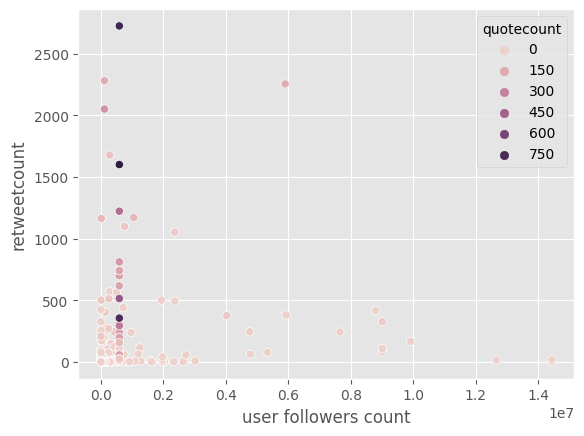

In [35]:
df_aktual = df[["user followers count", "retweetcount", "quotecount"]]
sns.scatterplot(x = "user followers count", y = "retweetcount", data = df_aktual, hue = "quotecount")
plt.show()